# Вальчевський Павло, ОІ-21сп, Варіант 2, ПР № 1
## Бізнес-цілі:
### Поліпшення класифікації пінгвінів:
#### Ціль моделювання: Розробка моделі машинного навчання, що точно класифікує пінгвінів за видами на основі фізичних характеристик.
#### Критерії успіху: 
- Алгоритм повинен визначити фізичні характеристики (гендерні особливості, маса і т. д.) на основі повноти даних про кожного пінгвіна.
- Визначення відповідної класифікації пінгвінів.
- Класифікація пінгвінів не суперечать даним, які залучені під час її створення.


### Поліпшити розуміння різноманіття та розподілу цих видів у регіоні:
#### Ціль моделювання: Аналіз результатів класифікації для виявлення ключових видів пінгвінів та їх розподілу в регіоні.
#### Критерії успіху: 
- Результати класифікації пінгвінів мають надати дані про різноманіття пінгвінів у регіоні. 
- На основі точності даних будуть формуватися звіти, що будуть сумувати розуміння про різноманіття пінгвінів.


### Підвищення ефективності досліджень:
#### Ціль моделювання: Забезпечення рішення для науковців, що полегшить процес ідентифікації та обліку пінгвінів.
#### Критерії успіху: 
- Науковці розуміють, що за дані їм представлені та можуть з ними взаємодіяти для подальших досліджень.
- Результати досліджень повинні надавати картину про стан пінгвінів та розуміння їх екологічного статусу.
- Виконані дослідження будуть основою для подальших досліджень, уявлення про повну картину щодо пінгвінів у регіоні.
- 

##### Переклад назви характеристик даних (для розуміння з якими даними буду працювати):
1)	Region - Регіон
2)	Island - Острів
3)	Stage - Стадія
4)	Individual ID - Ідентифікаційний номер
5)	Clutch Completion - Завершення кладки
6)	Date Egg - Дата яйця
7)	Culmen Length (mm) - Довжина дзьоба (мм)
8)	Culmen Depth (mm) - Глибина дзьоба (мм)
9)	Flipper Length (mm) - Довжина плавця (мм)
10)	Body Mass (g) - Маса тіла (г)
11)	Sex - Стать
12)	Delta 15 N (o/oo) - Дельта 15 N (о/оо)
13)	Delta 13 C (o/oo) - Дельта 13 C (о/оо)
14)	Comment - Коментар
15)	Species - Вид пінгвінів у регіоні




In [3]:
import os.path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
ds = pd.read_csv("./variant_2.csv")

### Демонстрація даних (перші 5)

In [6]:
ds.head(5)

,Unnamed: 0,studyName,Sample Number,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments,Species
0,0,PAL0708,0,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,NaN,7.63220,-27.01854,Not enough blood for isotopes.,Adelie Penguin (Pygoscelis adeliae)
1,1,PAL0708,1,Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,Nest never observed with full clutch.,Adelie Penguin (Pygoscelis adeliae)
2,2,PAL0708,2,Anvers,NaN,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,Nest never observed with full clutch.,Adelie Penguin (Pygoscelis adeliae)
3,3,PAL0708,3,Anvers,NaN,"Adult, 1 Egg Stage",NaN,Yes,11/16/07,41.1,17.0,190.0,3800.0,NaN,7.63220,-27.01854,NaN,Adelie Penguin (Pygoscelis adeliae)
4,4,PAL0708,4,Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,Nest never observed with full clutch.,Adelie Penguin (Pygoscelis adeliae)


### Перевірка на відсутність даних

In [8]:
print("Будь-які дані, що відстуні про пінгвінів:", ds.isnull().values.any())

Будь-які дані, що відстуні про пінгвінів: True


### Описи типів значень

In [10]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           456 non-null    int64  
 1   studyName            456 non-null    object 
 2   Sample Number        456 non-null    int64  
 3   Region               456 non-null    object 
 4   Island               411 non-null    object 
 5   Stage                452 non-null    object 
 6   Individual ID        411 non-null    object 
 7   Clutch Completion    452 non-null    object 
 8   Date Egg             456 non-null    object 
 9   Culmen Length (mm)   456 non-null    float64
 10  Culmen Depth (mm)    456 non-null    float64
 11  Flipper Length (mm)  456 non-null    float64
 12  Body Mass (g)        456 non-null    float64
 13  Sex                  411 non-null    object 
 14  Delta 15 N (o/oo)    456 non-null    float64
 15  Delta 13 C (o/oo)    456 non-null    flo

## Аналіз даних

### Розподіл між довжиною дзьоба та глибиною дзьоба пінгвіна
- з графіка можна побачити, що між більшістю осіб видів пінгвінів є істотна різниця 

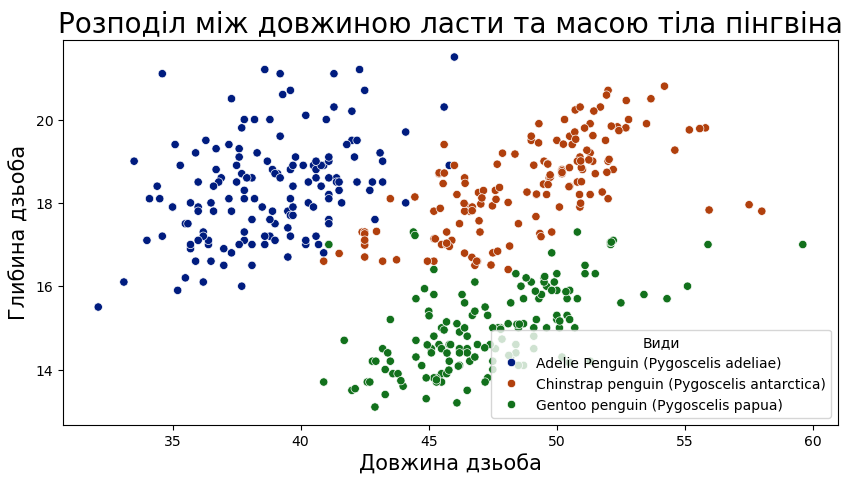

In [13]:
plt.rcParams["figure.figsize"] = (10, 5)
sns.scatterplot(data=ds, x="Culmen Length (mm)", y="Culmen Depth (mm)", hue="Species", palette="dark")
plt.title("Розподіл між довжиною ласти та масою тіла пінгвіна", fontsize=20)
plt.xlabel("Довжина дзьоба", fontsize=15)
plt.ylabel("Глибина дзьоба", fontsize=15)
plt.legend(title="Види")
plt.show()


### Розподіл між довжиною плавця та масою тіла пінгвіна
- з графіка можна побачити, що майже всі особи видів Adelie i Chinstrap мають подібні характеристики, ніж Gentoo, який колосально відрізняється

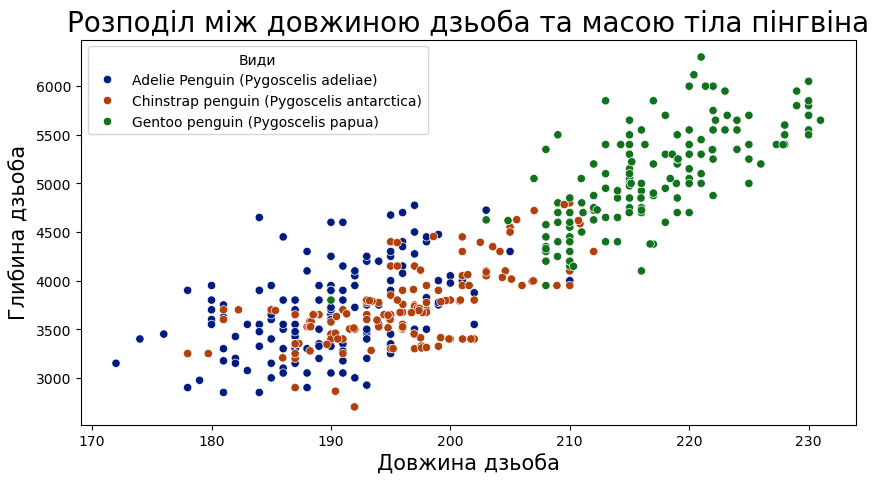

In [15]:
plt.rcParams["figure.figsize"] = (10, 5)
sns.scatterplot(data=ds, x="Flipper Length (mm)", y="Body Mass (g)", hue="Species", palette="dark")
plt.title("Розподіл між довжиною дзьоба та масою тіла пінгвіна", fontsize=20)
plt.xlabel("Довжина дзьоба", fontsize=15)
plt.ylabel("Глибина дзьоба", fontsize=15)
plt.legend(title="Види")
plt.show()

### Діаграма статі між усіма пінгвінами, де визначена стать
- розподіл між статтю у всіх пінгвінів (всіх видів) є майже рівномірний

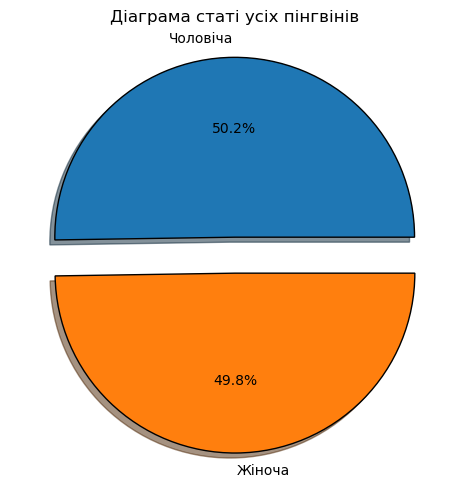

In [17]:
plt.rcParams["figure.figsize"] = (7, 5)
sex_counts = ds['Sex'].value_counts()
sex_counts = sex_counts[sex_counts.index.isin(['FEMALE', 'MALE'])]
slices = sex_counts
labels = sex_counts.index.to_series().replace({'FEMALE': 'Жіноча', 'MALE': 'Чоловіча'}).values
sex_counts.index = labels
explode = [0.1] * len(labels)

plt.pie(slices, labels=labels, explode=explode, wedgeprops={'edgecolor': 'black'}, shadow=True, autopct='%1.1f%%')
plt.title("Діаграма статі усіх пінгвінів")
plt.tight_layout()
plt.show()

### Діаграма статі між усіма пінгвінами виду Chinstrap, де визначена стать
- розподіл між статтю у пінгвінів з перевагою у жіночої частини

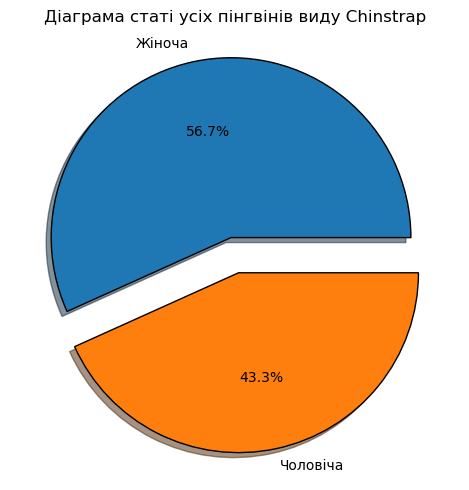

In [19]:
plt.rcParams["figure.figsize"] = (7, 5)
chinstrap_ds = ds[ds['Species'] == 'Chinstrap penguin (Pygoscelis antarctica)']
sex_counts = chinstrap_ds['Sex'].value_counts()
sex_counts = sex_counts[sex_counts.index.isin(['FEMALE', 'MALE'])]
slices = sex_counts
labels = sex_counts.index.to_series().replace({'FEMALE': 'Жіноча', 'MALE': 'Чоловіча'}).values
sex_counts.index = labels
explode = [0.1] * len(labels)

plt.pie(slices, labels=labels, explode=explode, wedgeprops={'edgecolor': 'black'}, shadow=True, autopct='%1.1f%%')
plt.title("Діаграма статі усіх пінгвінів виду Chinstrap")
plt.tight_layout()
plt.show()

### Діаграма статі між усіма пінгвінами виду Gentoo, де визначена стать
- розподіл між статтю у пінгвінів з перевагою у чоловічої частини

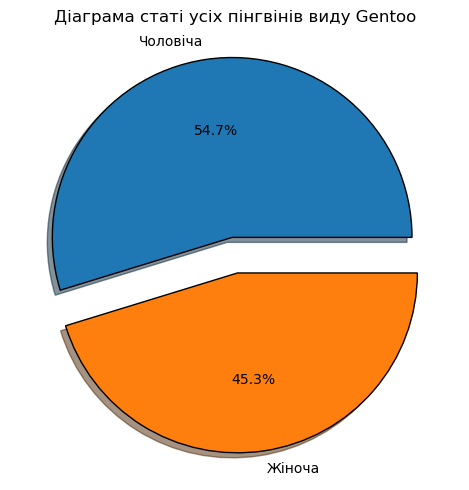

In [21]:
plt.rcParams["figure.figsize"] = (7, 5)
gentoo_ds = ds[ds['Species'] == 'Gentoo penguin (Pygoscelis papua)']
sex_counts = gentoo_ds['Sex'].value_counts()
sex_counts = sex_counts[sex_counts.index.isin(['FEMALE', 'MALE'])]
slices = sex_counts
labels = sex_counts.index.to_series().replace({'FEMALE': 'Жіноча', 'MALE': 'Чоловіча'}).values
sex_counts.index = labels
explode = [0.1] * len(labels)

plt.pie(slices, labels=labels, explode=explode, wedgeprops={'edgecolor': 'black'}, shadow=True, autopct='%1.1f%%')
plt.title("Діаграма статі усіх пінгвінів виду Gentoo")
plt.tight_layout()
plt.show()

### Діаграма статі між усіма пінгвінами виду Adelie, де визначена стать
- розподіл між статтю у пінгвінів з перевагою у чоловічої частини

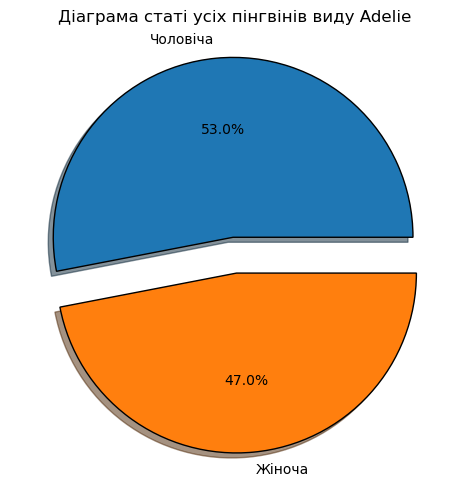

In [23]:
plt.rcParams["figure.figsize"] = (7, 5)
adelie_ds = ds[ds['Species'] == 'Adelie Penguin (Pygoscelis adeliae)']
sex_counts = adelie_ds['Sex'].value_counts()
sex_counts = sex_counts[sex_counts.index.isin(['FEMALE', 'MALE'])]
slices = sex_counts
labels = sex_counts.index.to_series().replace({'FEMALE': 'Жіноча', 'MALE': 'Чоловіча'}).values
sex_counts.index = labels
explode = [0.1] * len(labels)

plt.pie(slices, labels=labels, explode=explode, wedgeprops={'edgecolor': 'black'}, shadow=True, autopct='%1.1f%%')
plt.title("Діаграма статі усіх пінгвінів виду Adelie")
plt.tight_layout()
plt.show()

### Кореляційна матриця між числовими характеристиками пінгвінів

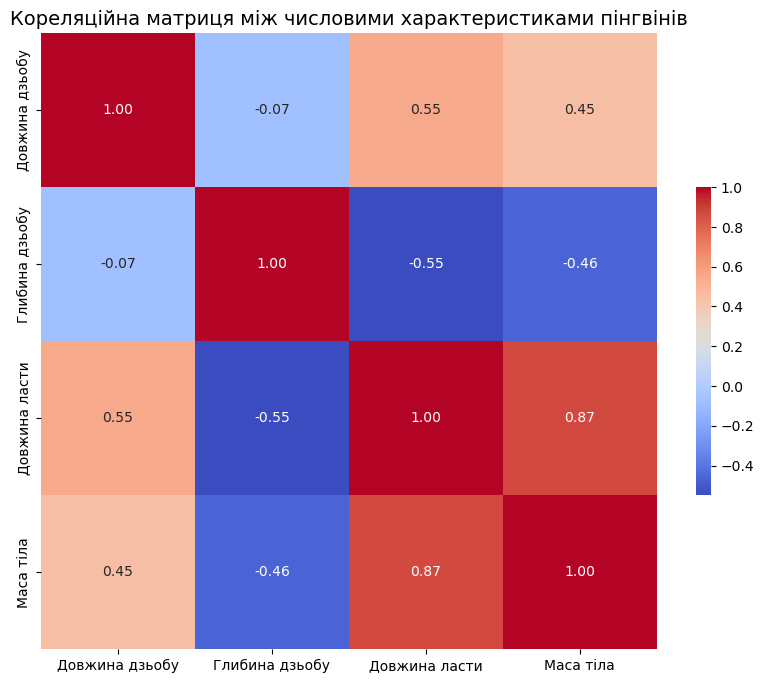

In [25]:
cols_for_corr = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']
cols_for_corr_labels = ['Довжина дзьобу', 'Глибина дзьобу', 'Довжина ласти', 'Маса тіла']
correlation_matrix = ds[cols_for_corr].corr()

plt.rcParams["figure.figsize"] = (10, 8)

sns.heatmap(
    correlation_matrix,
    vmax=1,
    square=True,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    cbar_kws={"shrink": .5},
    xticklabels=cols_for_corr_labels,
    yticklabels=cols_for_corr_labels
)

plt.title('Кореляційна матриця між числовими характеристиками пінгвінів', fontsize=14)
plt.show()

### Діаграма між статями і видом пінгвінів та їх кількістю
- діаграма відповідає відсотковому співвідношенню між статями кожного виду (вище описані діаграми)

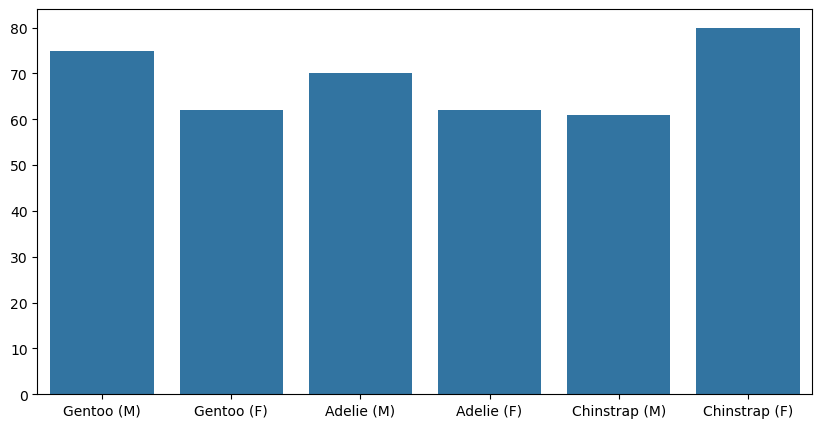

In [27]:
gentoo_ds = ds[ds['Species'] == 'Gentoo penguin (Pygoscelis papua)']
adelie_ds = ds[ds['Species'] == 'Adelie Penguin (Pygoscelis adeliae)']
chinstrap_ds = ds[ds['Species'] == 'Chinstrap penguin (Pygoscelis antarctica)']

sex_counts_gentoo_male = gentoo_ds[gentoo_ds['Sex'] == 'MALE'].shape[0]
sex_counts_gentoo_female = gentoo_ds[gentoo_ds['Sex'] == 'FEMALE'].shape[0]
sex_counts_adelie_male = adelie_ds[adelie_ds['Sex'] == 'MALE'].shape[0]
sex_counts_adelie_female = adelie_ds[adelie_ds['Sex'] == 'FEMALE'].shape[0]
sex_counts_chinstrap_male = chinstrap_ds[chinstrap_ds['Sex'] == 'MALE'].shape[0]
sex_counts_chinstrap_female = chinstrap_ds[chinstrap_ds['Sex'] == 'FEMALE'].shape[0]

species = ['Gentoo (M)', 'Gentoo (F)', 'Adelie (M)', 'Adelie (F)', 'Chinstrap (M)', 'Chinstrap (F)']
counts = [sex_counts_gentoo_male, sex_counts_gentoo_female, sex_counts_adelie_male, sex_counts_adelie_female, sex_counts_chinstrap_male, sex_counts_chinstrap_female]

plt.rcParams["figure.figsize"] = (10, 5)
ax = sns.barplot(x=species, y=counts)
plt.show()

## Висновки
- У даній ПР було досліджено та продемонстровано графіки, що будуються за допомогою фізичних характеристик пінгвінів.
- Було збудовано кореляційну матрицю на основі даних 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)': усі значення знаходяться у діапазоні [-1; 1], що свідчить про правильність цієї матриці та з аналізу видно, що слід обрати інші дані для аналізу фізичних характеристик, оскільки значення ближче до 1. Наприклад, Довжина ласти і Маса тіла мають 0.88.
- Було зображено розподілення між ('Flipper Length (mm)', 'Body Mass (g)') з такими висновками: всі особи видів Adelie i Chinstrap мають подібні характеристики, ніж Gentoo, який колосально відрізняється.
- Було зображено розподілення між ('Culmen Length (mm)', 'Culmen Depth (mm)') з такими висновками: між більшістю осіб видів пінгвінів є істотна різниця.
- Було побудовано діаграму між статями усіх видів у відсотках (Ч == Ж), виду Adelie (Ч > Ж), виду Chinstrap (Ч < Ж), Gentoo (Ч > Ж) і для перевірки даних, було побудовано стовпчасту діаграму по статі і виду до кількості осіб, що відповідає відсотковим діаграмам.

## Цікаві факти з аналізу даних
- Персоналізована реклама. Є багато різних алгоритмів, які дозволяють за допомогою аналізу даних пропонувати рекламу кожному окремому користувачеві на основі його активності. Інколи ця реклама є корисною, але як правильно в більшості випадків, люди просто її ігнорують.
- Розпізнавання облич. Це хороша технологія, що також базується на аналізі даних. Дана технологія використовується в тому числі правоохоронними органами, що дозволяють ефективно шукати різних злочинців.
- Дослідження космосу та океану. Дані, що отримані з телескопів або ґрунту океанів дозволяють робити цікаві висновки про космос або океан, що можуть дати поштовх до подальших процесів чи явищ, які з цим пов'язані.